<a href="https://colab.research.google.com/github/jordan-bonev/Loan-Risk-Predicition/blob/main/Loan-Risk-Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Loan Risk Prediction

## Context

In the following notebook I will explore two datasets containing German loan applicants and Indian loan applicants respectively. The two datasets have different amount of features. The target value of both datasets is **risk** which shows if the applicant has a credit risk. I will perform EDA , I will inspect the data for missing values, check the distribution of features, encode categorical features and more. Finally I am going to apply a simple Machine Learning model - Logaritmic regression.

##German Loans

First, I will begin with exploring the German Loans Dataset

###Get to know the data

In [4]:
german_loans = pd.read_csv("/content/german_credit_data.csv")

In [5]:
german_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


Te **german_loans** dataset has NULL values only in two columns: Saving accounts and Checking account. I will come back to them later.

Let's give more pythonic names to the columns.

In [8]:
german_loans.columns = ["applicant_id", "age", "sex", "job", "housing", "saving_accounts", "checking_account", "credit_amount", "duration", "purpose", "risk"]

In [9]:
german_loans.head()

,applicant_id,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [10]:
german_loans.tail()

,applicant_id,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad
999,999,27,male,2,own,moderate,moderate,4576,45,car,good


In [11]:
german_loans.describe().T

,count,mean,std,min,25%,50%,75%,max
applicant_id,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
age,1000.0,35.546,11.375469,19.0,27.00,33.0,42.00,75.0
job,1000.0,1.904,0.653614,0.0,2.00,2.0,2.00,3.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.50,2319.5,3972.25,18424.0
duration,1000.0,20.903,12.058814,4.0,12.00,18.0,24.00,72.0


In [12]:
german_loans.dtypes

applicant_id         int64
age                  int64
sex                 object
job                  int64
housing             object
saving_accounts     object
checking_account    object
credit_amount        int64
duration             int64
purpose             object
risk                object
dtype: object

Let's see the distribution of the target variable - risk.

In [23]:
german_loans["risk"] = german_loans["risk"].replace({"good":0, "bad":1})

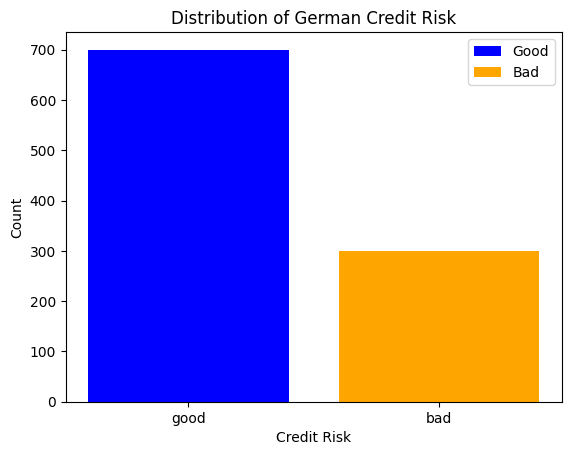

In [47]:
target_counts = german_loans["risk"].value_counts()

plt.bar(target_counts.index, target_counts.values, color = ["blue","orange"])
plt.legend(plt.bar(target_counts.index, target_counts.values, color = ["blue","orange"]), ["Good", "Bad"])
plt.xlabel("Credit Risk")
plt.xticks([0,1], ["good", "bad"])
plt.ylabel("Count")
plt.title("Distribution of German Credit Risk")

plt.show()

700 of the applicants have good Credit Risk and the oter 300 have bad Credit Risk.

Let's see the unique values in all columns (I skip **applicant_id** because it is unique for every applicant. I skip **cerdit_amount** for the same reason).

In [62]:
for column in german_loans.columns:
  if column in ["applicant_id","credit_amount"]:
    pass
  else:
    unique_values = german_loans[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'age': [67 22 49 45 53 35 61 28 25 24 60 32 44 31 48 26 36 39 42 34 63 27 30 57
 33 37 58 23 29 52 50 46 51 41 40 66 47 56 54 20 21 38 70 65 74 68 43 55
 64 75 19 62 59]
Unique values in column 'sex': ['male' 'female']
Unique values in column 'job': [2 1 3 0]
Unique values in column 'housing': ['own' 'free' 'rent']
Unique values in column 'saving_accounts': [nan 'little' 'quite rich' 'rich' 'moderate']
Unique values in column 'checking_account': ['little' 'moderate' nan 'rich']
Unique values in column 'duration': [ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]
Unique values in column 'purpose': ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']
Unique values in column 'risk': [0 1]


In the **job** column there are 4 values - 0,1,2,3 with the respective meaning:

0 - unskilled and non-resident
1 - unskilled and resident
2 - skilled
3 - higly skilled

##Exploratry Data Analysis

I will deep dive into data. I will analyze every column I try to find if there are any patterns.

Let's start with the **age** column

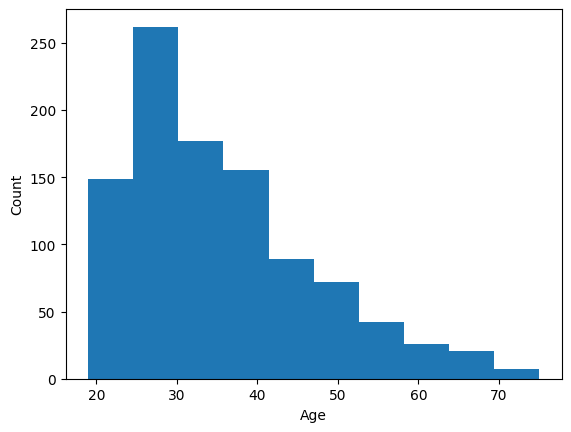

In [63]:
plt.hist(german_loans.age)
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [75]:
german_good = german_loans[german_loans["risk"]==0 ]
german_bad = german_loans[german_loans["risk"]==1]

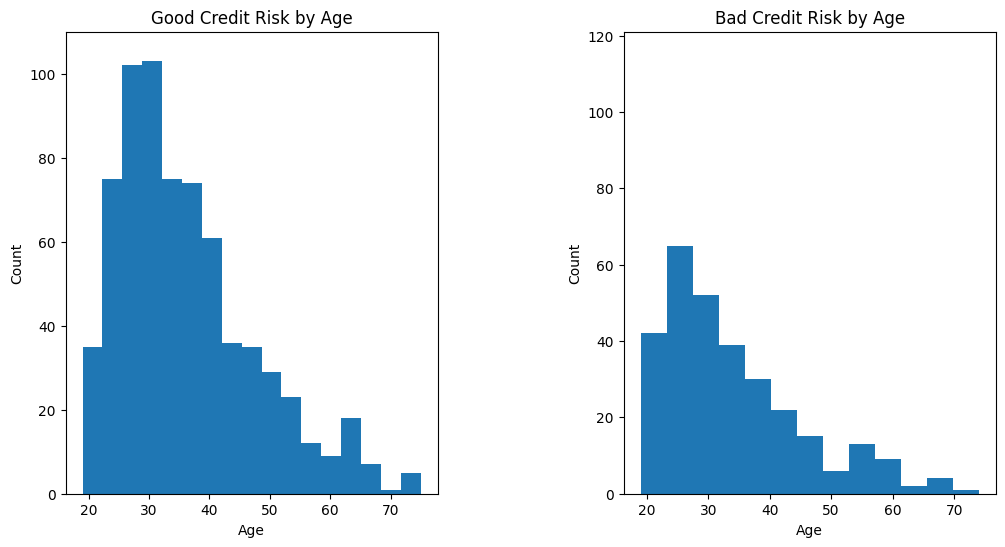

In [105]:
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)

plt.hist(german_good.age, bins = "fd")
plt.title("Good Credit Risk by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.ylim(0, 110)

plt.subplots_adjust(wspace = 0.5)

plt.subplot(1,2,2)
plt.hist(german_bad.age, bins = "fd")
plt.title("Bad Credit Risk by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.ylim(0, 121)

plt.show()